<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [34]:
import pandas as pd
# from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np


## Load the dataset

In [35]:
url = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Check dataset behaviour

In [36]:
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.shape

(7043, 21)

## Data Preprocessing

In [38]:
df_clean=df.copy()

In [39]:
df_clean=df_clean.drop(columns=['customerID'],axis=1)
df_clean=df_clean.drop(columns=['gender'],axis=1)
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df_clean.shape

(7043, 19)

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [42]:
df_clean["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [43]:
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors='coerce')

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [45]:
df_clean["TotalCharges"].isnull().sum()

np.int64(11)

In [46]:
df_clean['TotalCharges'].fillna(df_clean['tenure'] * df_clean['MonthlyCharges'], inplace=True)


C:\Users\chanu\AppData\Local\Temp\ipykernel_14712\2534775484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(df_clean['tenure'] * df_clean['MonthlyCharges'], inplace=True)


In [47]:
df_clean["TotalCharges"].isnull().sum()

np.int64(0)

In [48]:
(df_clean["TotalCharges"]==0).any()

np.True_

In [49]:
df_clean['AvgMonthlyCharge']     = df_clean['TotalCharges'] / (df_clean['tenure'] + 1)
df_clean['IsNewCustomer']        = (df_clean['tenure'] <= 6).astype(int)
df_clean['Contract_Monthly']     = (df_clean['Contract'] == 'Month-to-month').astype(int)
df_clean['HasFiber']             = (df_clean['InternetService'] == 'Fiber optic').astype(int)
df_clean['IsHighCharge'] = (df_clean['MonthlyCharges'] >= 80).astype(int)
df_clean['Monthly_Tenure_Ratio'] = df_clean['MonthlyCharges'] / (df_clean['tenure'] + 1)
df_clean['Total_Monthly_Ratio']  = df_clean['TotalCharges'] / (df_clean['MonthlyCharges'] + 1)

In [50]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

In [51]:
df_clean['MultipleLines'] = df_clean['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': -1})


In [52]:
no_internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in no_internet_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0, 'No internet service': -1})


In [53]:
addon_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies']
df_clean['TotalAddons'] = (df_clean[addon_cols] == 1).sum(axis=1)  # only count actual "Yes"
df_clean['TotalServices'] = (
    (df_clean['PhoneService'] == 1).astype(int) +
    (df_clean['InternetService'] != 'No').astype(int) +
    df_clean['TotalAddons']
)
df_clean.drop('TotalAddons', axis=1, inplace=True)

In [54]:
df_clean = pd.get_dummies(df_clean, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False,dtype=int)
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})


In [55]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [56]:
df_clean.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
AvgMonthlyCharge                           0
IsNewCustomer                              0
Contract_Monthly                           0
HasFiber                                   0
IsHighCharge                               0
Monthly_Tenure_Ratio                       0
Total_Mont

In [57]:
df_clean["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [58]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'IsNewCustomer',
       'Contract_Monthly', 'HasFiber', 'IsHighCharge', 'Monthly_Tenure_Ratio',
       'Total_Monthly_Ratio', 'TotalServices', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
X.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
AvgMonthlyCharge                           float64
IsNewCustomer                                int64
Contract_Monthly                             int64
HasFiber                                     int64
IsHighCharge                   

In [60]:
X.shape

(7043, 33)

In [61]:
y.shape

(7043,)

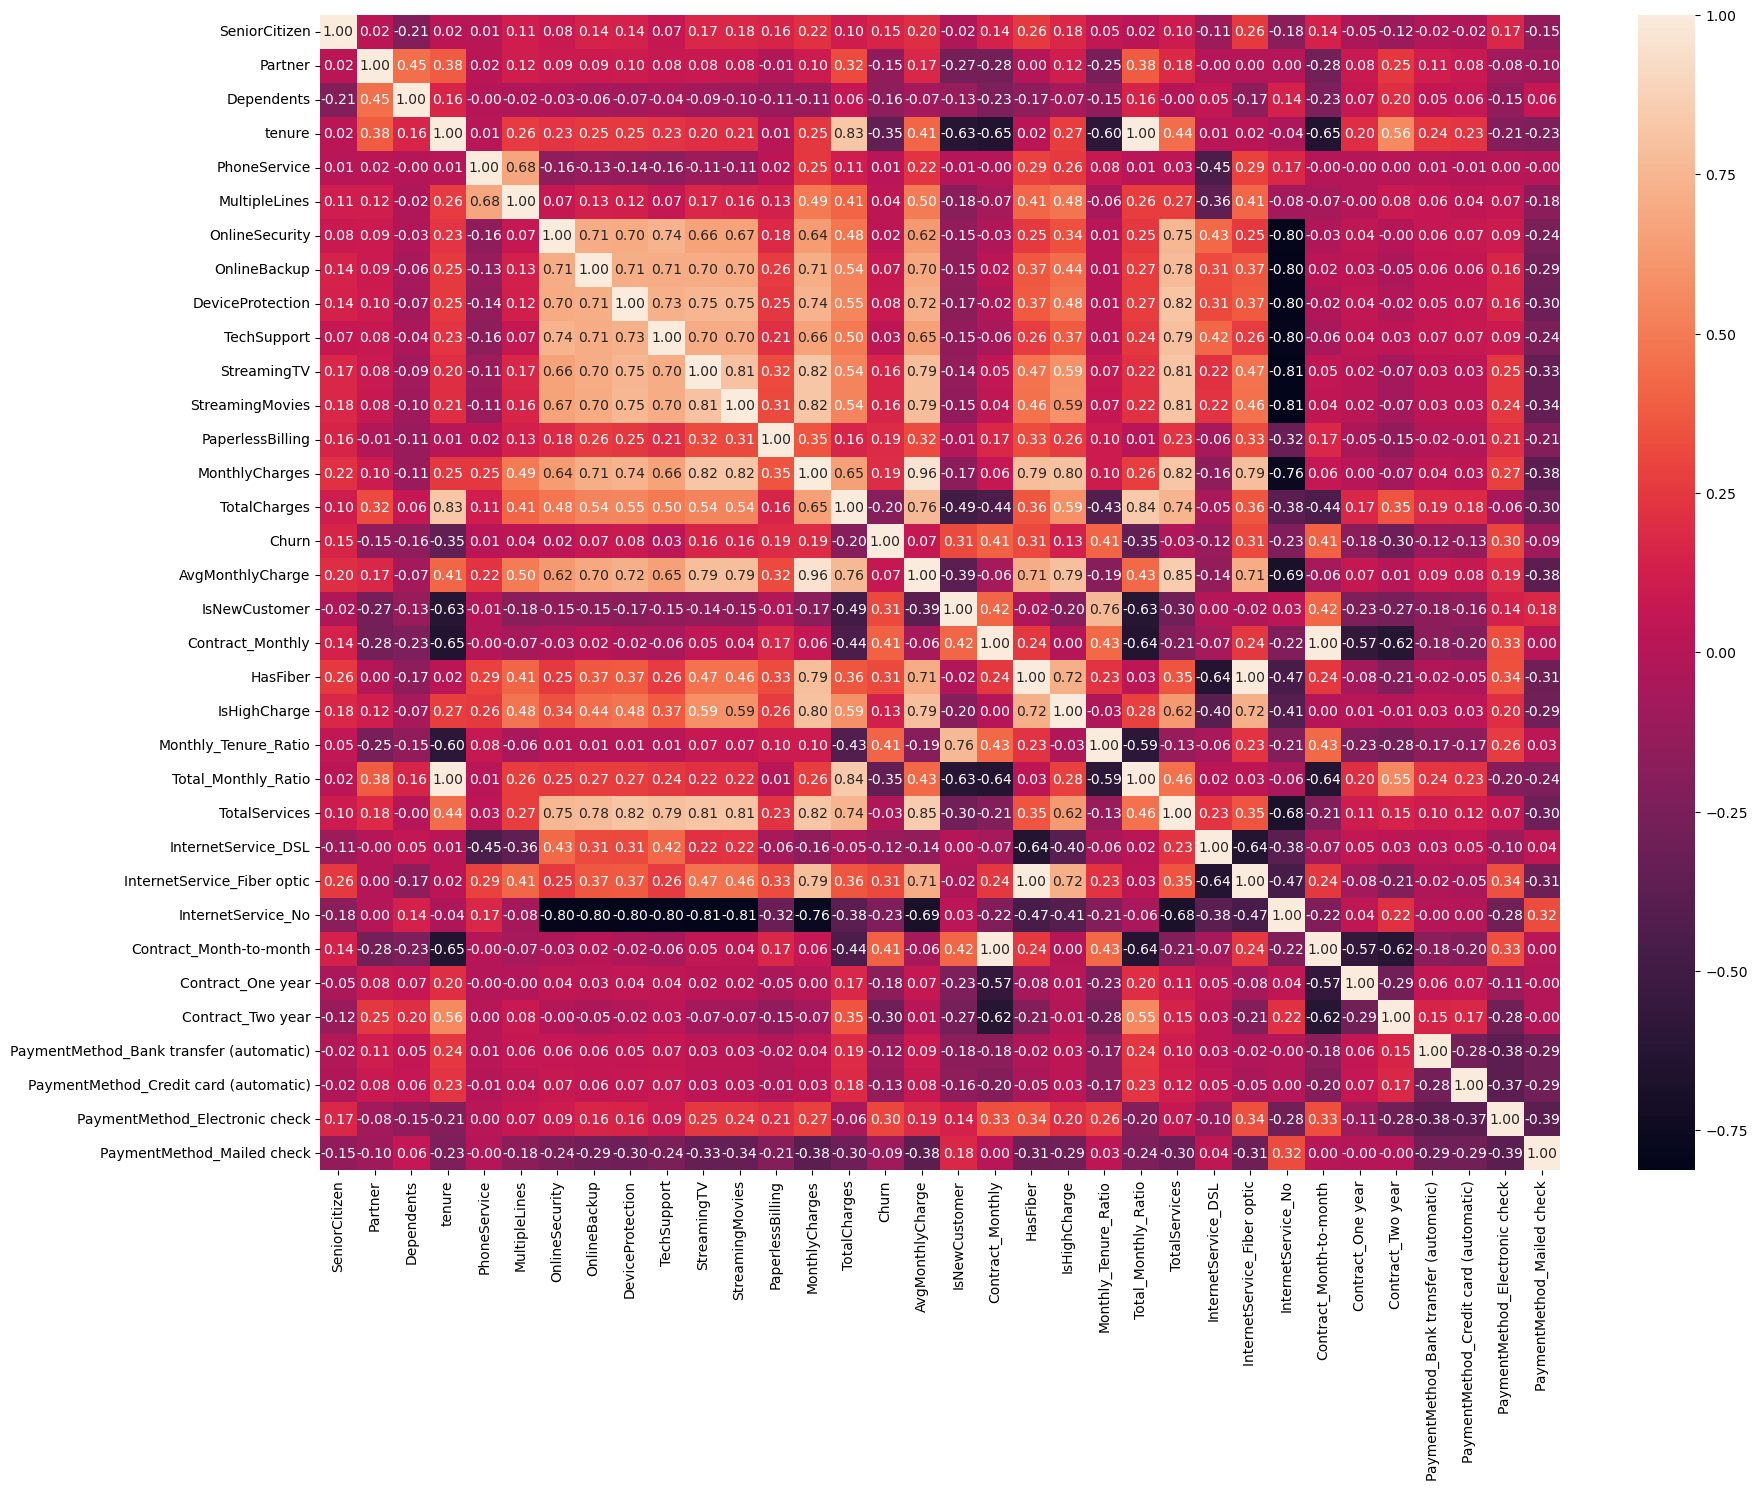

In [62]:
corr=df_clean.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [63]:
X.to_csv("dataset/processed/set_02/X.csv", index=False)
y.to_csv("dataset/processed/set_02/y_data.csv", index=False)
